# Plots of reference vectors

These figures show scatter plots of reference vectors generated from typical two-dimensional datasets by OKRB, SOMRB, NGRB, online k-means, SOM, neural gas (NG), and growing neural gas (GNG). The black and cyan dots indicate reference vectors and data points. __The parameters of online k-means, SOM, and NG do not decay.__

In [1]:
import numpy as np
import math as mt
import networkx as nx
import matplotlib.pyplot as plt

from dataset import Datasets

from ngrb import NGRB
from ng import NG
from gng import GNG
from kohonen_2d import Kohonen
from okmeans import OKMEANS
from okrb import OKRB
from somrb import SOMRB

titles = ["Blobs", "Circles", "Moons","Aggregation", "Compound", "Pathbased", "R15", "Spiral", "D31", "R15", "Jain", "Flame","t4.8k", "Complex9", "t7.10k", "t8.8k"]
soms = ["OKRB", "SOMRB", "NGRB", "online-kmeans", "SOM", "NG", "GNG"]


Datasets = Datasets()
dim = 2
end = 20000

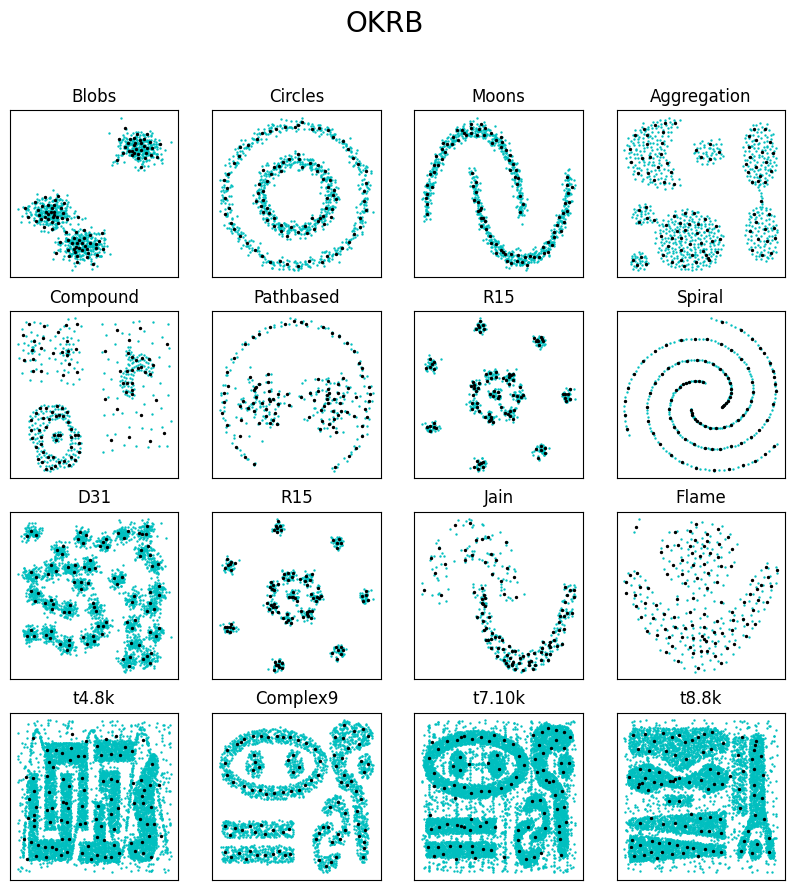

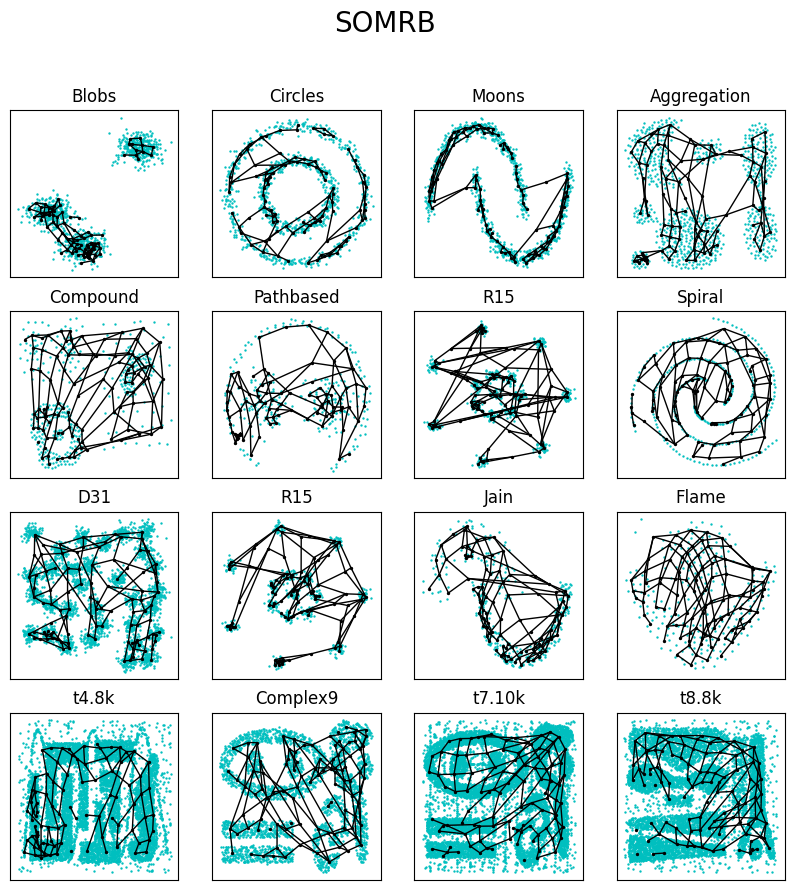

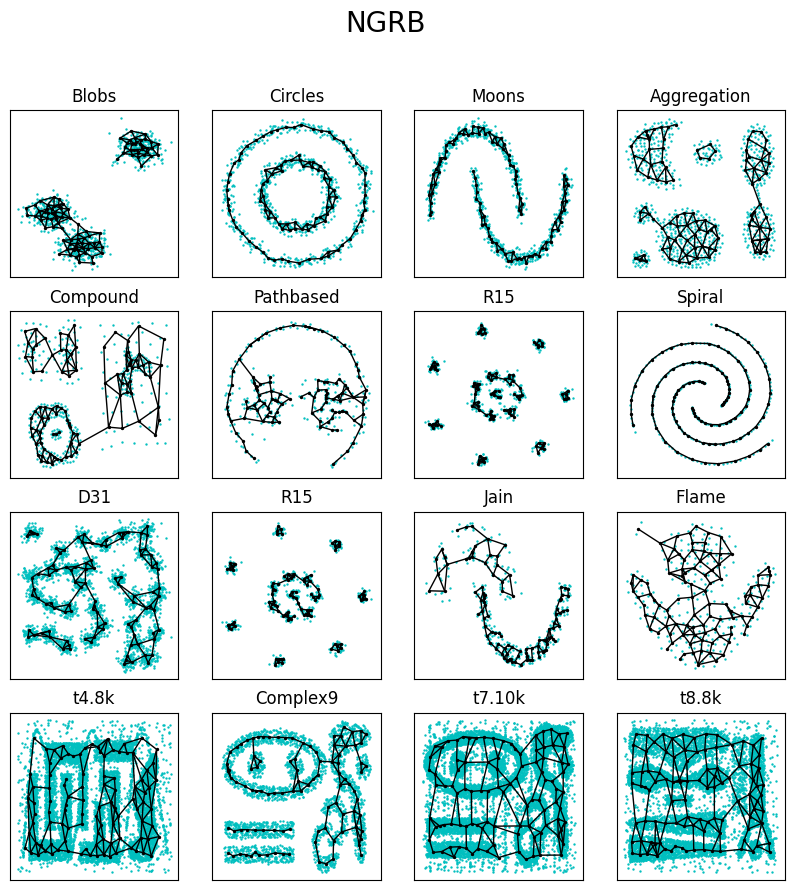

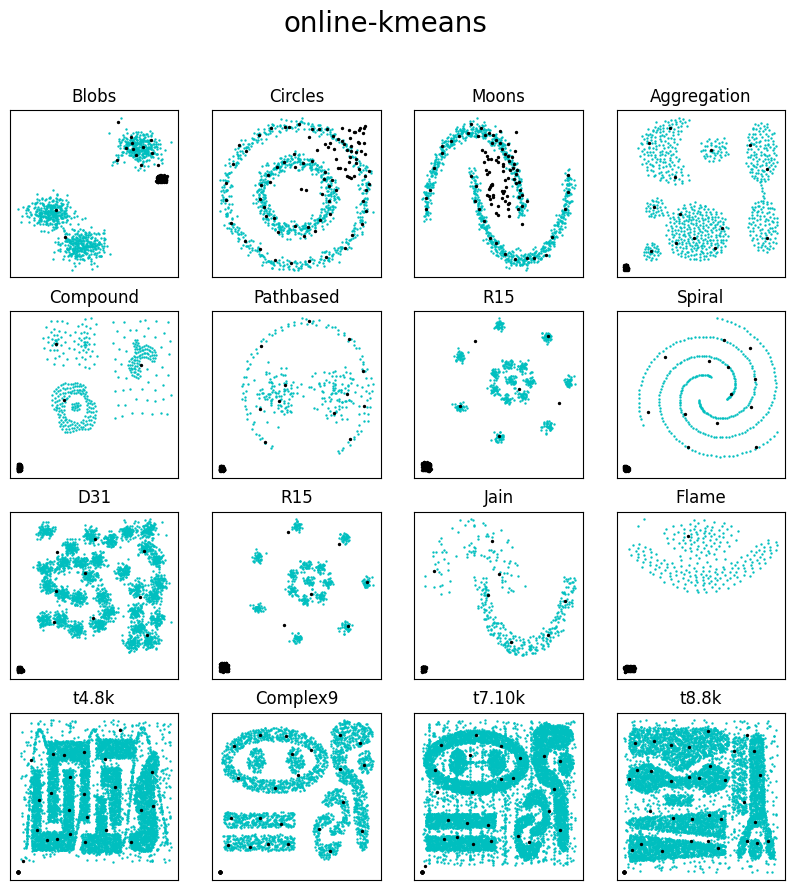

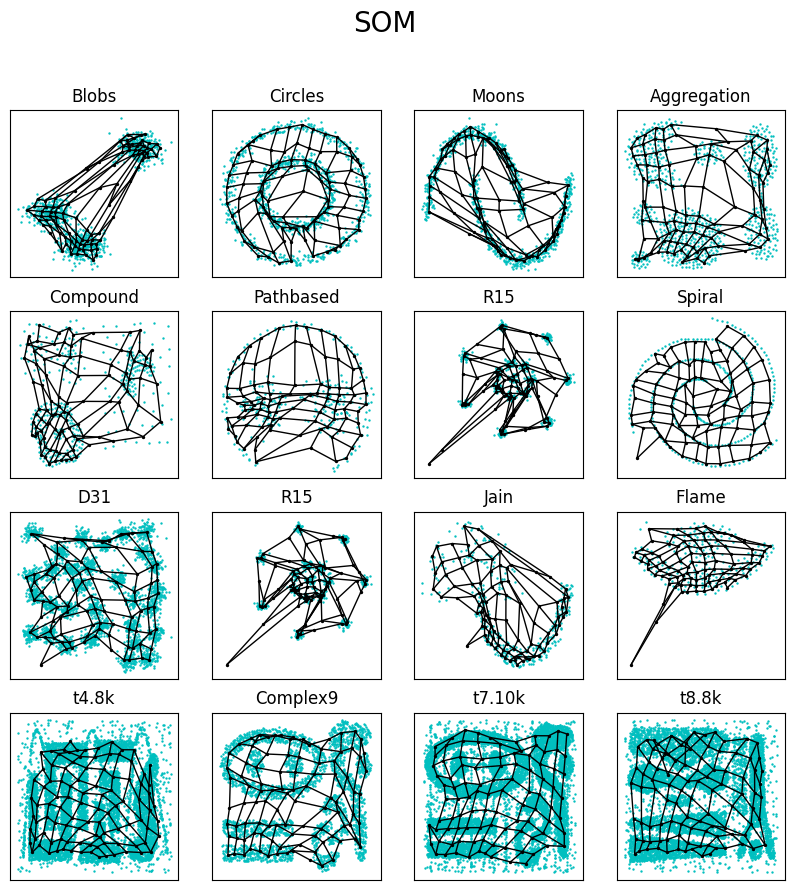

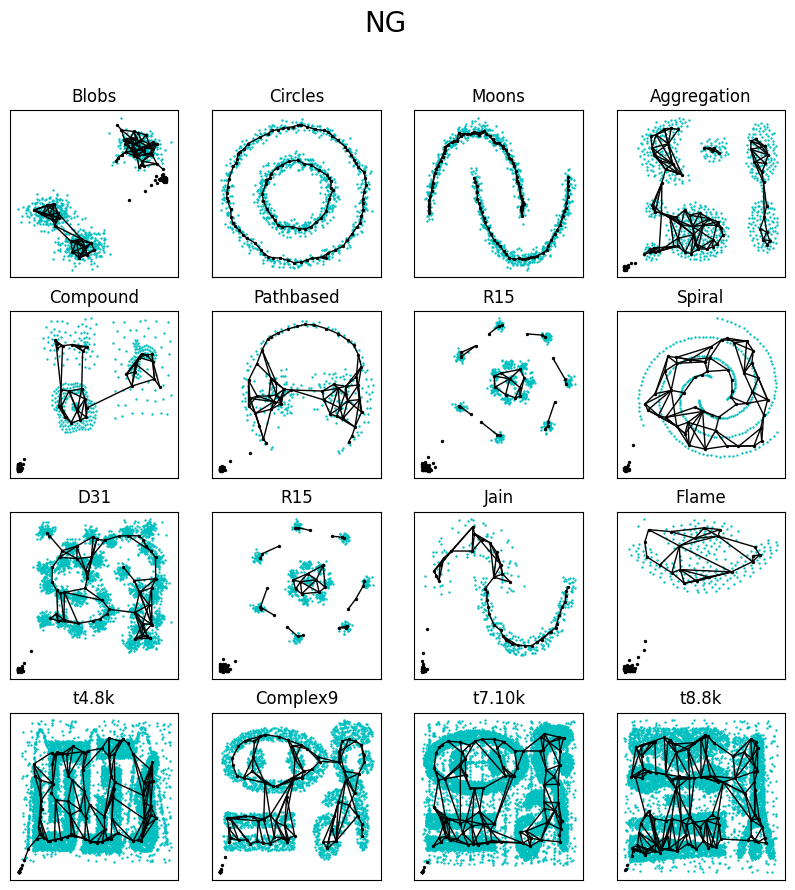

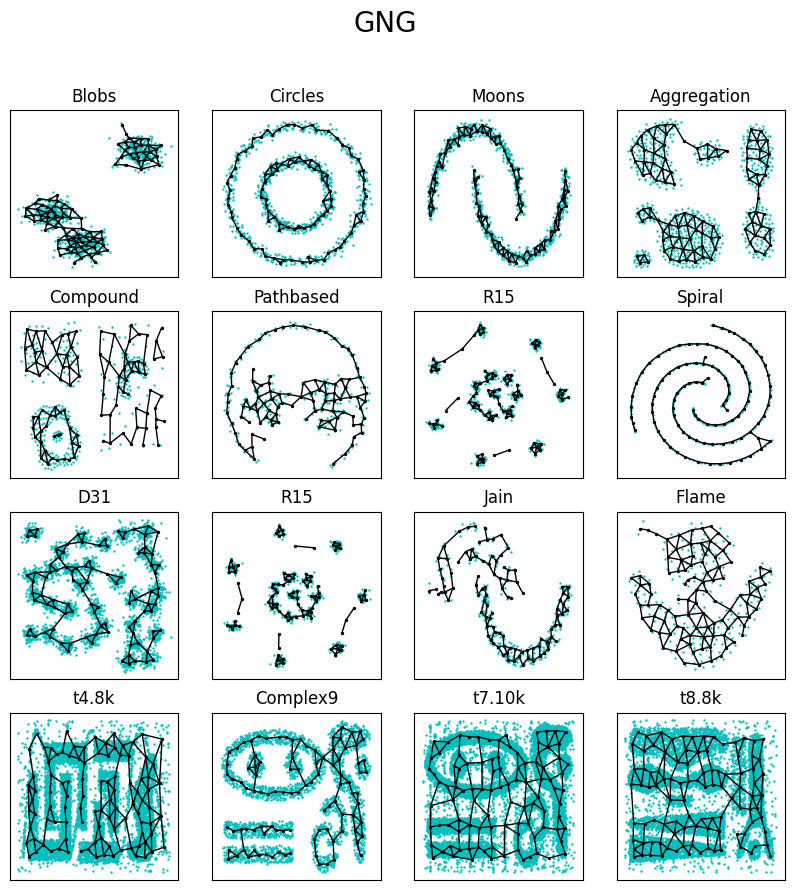

In [2]:

for f in range(len(soms)):
    if soms[f] == "NG":
        som = NG(dim = dim, end = end, num = 100, lam_i = 2, ew_i = 0.3, amax_i = 75, decay = False)
    elif soms[f] == "GNG":
        som = GNG(dim = dim, end = end, num = 100, lam = 50, ew = 0.1, en = 0.0005, alpha = 0.25, beta = 0.999, amax = 25)
    elif soms[f] == "SOM":
        som = Kohonen(dim = dim, end = end, num = 10, rate = 0.4, sigma = 0.5, decay = False)
    elif soms[f] == "online-kmeans":
        som = OKMEANS(dim = dim, num = 100, lam = 0.5, end = end, decay = False)
    elif soms[f] == "OKRB":
        som = OKRB(dim = dim, end = end, num = 100, lam = 0.1, th_rb = 0.01, beta = 0.005, rb_metric = "num_wins")
    elif soms[f] == "OKRB_error":
        som = OKRB(dim = dim, end = end, num = 100, lam = 0.3, th_rb = 0.01, beta = 0.005, rb_metric = "error")
    elif soms[f] == "SOMRB":
        som = SOMRB(dim = dim, end = end, num = 100, rate = 0.2, sigma = 0.5, th_rb = 0.1, beta = 0.0001, rb_metric = "num_wins")
    elif soms[f] == "SOMRB_error":
        som = SOMRB(dim = dim, end = end, num = 100, rate = 0.3, sigma = 0.5, th_rb = 0.5, beta = 0.0005, rb_metric = "error")
    elif soms[f] == "NGRB":
        som = NGRB(dim = dim, end = end, num = 100, lam = 0.5, ew = 0.3, amax = 75, th_rb = 0.01, beta = 0.005, rb_metric = "num_wins")
    elif soms[f] == "NGRB_error":
        som = NGRB(dim = dim, end = end, num = 100, lam = 1.0, ew = 0.3, amax = 100, th_rb = 0.01, beta = 0.005, rb_metric = "error")


    np.random.seed(1)

    plt.figure(figsize=(10,10))
    plt.suptitle(soms[f], fontsize=20)

    for i in range(len(titles)):
        ax = plt.subplot(4, 4, i+1)
        ax.set_title(titles[i])

        k, data, true_labels = Datasets.dataset(titles[i])
        som.initialize_units()
        for t in range(1, end + 1):
            x = data[np.random.choice(data.shape[0])]
            som.learn(x, t)

        plt.scatter(data[:,0], data[:,1], s=0.5, c="c")

        if soms[f] == "online-kmeans" or  soms[f] == "OKRB" or  soms[f] == "OKRB_error":
            plt.scatter(som.units[:,0], som.units[:,1], s=2,c='k')
        else:
            nodes = nx.number_of_nodes(som.g_units)
            edges = 2 * nx.number_of_edges(som.g_units) / float(nx.number_of_nodes(som.g_units))
            clustering = nx.average_clustering(som.g_units)

            nx.draw_networkx_nodes(som.g_units, som.units, node_size=2, node_color=[(0,0,0)])
            nx.draw_networkx_edges(som.g_units, som.units, width=1, edge_color='k')

        plt.xticks([])
        plt.yticks([])

    plt.show()
    